In [2]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas
from DaskProfileReader import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
def SchedulerDelay(profiles):
    length = 0
    for profile in profiles:
        if len(profile) > length:
            length = len(profile)

    delays = np.zeros((len(profiles),length))
    for i in range(len(profiles)):
        start_times = profiles[i]
        start_times.sort()
        start_times = start_times-start_times[0]
        delays[i,0:len(start_times)] = start_times
        
    return delays

def SchedulerDelayDist(profiles,measure='start'):
    delays = np.array([])
    if measure == 'end':
        index = 1
    else:
        index = 0
    
    for profile in profiles:
        times = profile[1][:,index]
        times.sort()
        times = times-times[0]
        delays = np.append(delays,times)
    
    return delays

def TaskPerSecHist(array):
    exps = array.shape[0]
    temp = list()
    maxlen=0
    for i in range(0,exps):
        c =[0]
        sec =1
        for j in range(1,array.shape[1]):
            if array[i,j-1]<sec:
                c[sec-1]+=1
            else:
                sec+=1
                c.append(1)
        if len(c)> maxlen:
            maxlen=len(c)
        temp.append(c)
        
    hists = np.zeros((exps,maxlen))
    for i in range(0,exps):
        hists[i,0:len(temp[i])]=temp[i]
    
    return hists


In [4]:
# Dask Distributed 16 threads per node. Stampede
profiles_dist_16_16t=list()
profiles_dist_32_16t=list()
profiles_dist_48_16t=list()
profiles_dist_64_16t=list()

#From Profiles
ProfileDict1_16 = list()
ProfileDict1_32 = list()
ProfileDict1_48 = list()
ProfileDict1_64 = list()
for i in range(0,10):
    profiles_dist_16_16t.append(np.load('Stampede/Throughput/Iteration4/16threads/timingsThc_1n_%02d.npz.npy'%(i+1)))
    profiles_dist_32_16t.append(np.load('Stampede/Throughput/Iteration4/16threads/timingsThc_2n_%02d.npz.npy'%(i+1)))
    profiles_dist_48_16t.append(np.load('Stampede/Throughput/Iteration4/16threads/timingsThc_3n_%02d.npz.npy'%(i+1)))
    profiles_dist_64_16t.append(np.load('Stampede/Throughput/Iteration4/16threads/timingsThc_4n_%02d.npz.npy'%(i+1)))
    
    prof = DaskProfileReader('Stampede/Throughput/Iteration4/16threads/timingsThc_1n_%02d.txt'%(i+1))
    ProfileDict1_16.append(prof[prof['name']=='inc']['stop'].values)
    prof = DaskProfileReader('Stampede/Throughput/Iteration4/16threads/timingsThc_2n_%02d.txt'%(i+1))
    ProfileDict1_32.append(prof[prof['name']=='inc']['stop'].values)
    prof = DaskProfileReader('Stampede/Throughput/Iteration4/16threads/timingsThc_3n_%02d.txt'%(i+1))
    ProfileDict1_48.append(prof[prof['name']=='inc']['stop'].values)
    prof = DaskProfileReader('Stampede/Throughput/Iteration4/16threads/timingsThc_4n_%02d.txt'%(i+1))
    ProfileDict1_64.append(prof[prof['name']=='inc']['stop'].values)

In [5]:
distDelay_16_16t = SchedulerDelayDist(profiles_dist_16_16t,measure='end')
distDelay_32_16t = SchedulerDelayDist(profiles_dist_32_16t,measure='end')
distDelay_48_16t = SchedulerDelayDist(profiles_dist_48_16t,measure='end')
distDelay_64_16t = SchedulerDelayDist(profiles_dist_64_16t,measure='end')

distDelay_16_16t = distDelay_16_16t.reshape(10,100000)
distDelay_32_16t = distDelay_32_16t.reshape(10,100000)
distDelay_48_16t = distDelay_48_16t.reshape(10,100000)
distDelay_64_16t = distDelay_64_16t.reshape(10,100000)

distDelay_16_16t_hist = TaskPerSecHist(distDelay_16_16t)
distDelay_32_16t_hist = TaskPerSecHist(distDelay_32_16t)
distDelay_48_16t_hist = TaskPerSecHist(distDelay_48_16t)
distDelay_64_16t_hist = TaskPerSecHist(distDelay_64_16t)

distDelay1_16 = SchedulerDelay(ProfileDict1_16)
distDelay1_32 = SchedulerDelay(ProfileDict1_32)
distDelay1_48 = SchedulerDelay(ProfileDict1_48)
distDelay1_64 = SchedulerDelay(ProfileDict1_64)

distDelay1_16_hist = TaskPerSecHist(distDelay1_16)
distDelay1_32_hist = TaskPerSecHist(distDelay1_32)
distDelay1_48_hist = TaskPerSecHist(distDelay1_48)
distDelay1_64_hist = TaskPerSecHist(distDelay1_64)

In [6]:
# Dask Distributed 16 procs per node. Stampede
profiles_dist_16_1t=list()
profiles_dist_32_1t=list()
profiles_dist_48_1t=list()
profiles_dist_64_1t=list()

#From Profiles
ProfileDict_16 = list()
ProfileDict_32 = list()
ProfileDict_48 = list()
ProfileDict_64 = list()
for i in range(0,10):
    profiles_dist_16_1t.append(np.load('Stampede/Throughput/Iteration4/16procs/timingsThc_1n_%02d.npz.npy'%(i+1)))
    profiles_dist_32_1t.append(np.load('Stampede/Throughput/Iteration4/16procs/timingsThc_2n_%02d.npz.npy'%(i+1)))
    profiles_dist_48_1t.append(np.load('Stampede/Throughput/Iteration4/16procs/timingsThc_3n_%02d.npz.npy'%(i+1)))
    profiles_dist_64_1t.append(np.load('Stampede/Throughput/Iteration4/16procs/timingsThc_4n_%02d.npz.npy'%(i+1)))
    
    prof = DaskProfileReader('Stampede/Throughput/Iteration4/16procs/timingsThc_1n_%02d.txt'%(i+1))
    ProfileDict_16.append(prof[prof['name']=='inc']['stop'].values)
    prof = DaskProfileReader('Stampede/Throughput/Iteration4/16procs/timingsThc_2n_%02d.txt'%(i+1))
    ProfileDict_32.append(prof[prof['name']=='inc']['stop'].values)
    prof = DaskProfileReader('Stampede/Throughput/Iteration4/16procs/timingsThc_3n_%02d.txt'%(i+1))
    ProfileDict_48.append(prof[prof['name']=='inc']['stop'].values)
    prof = DaskProfileReader('Stampede/Throughput/Iteration4/16procs/timingsThc_4n_%02d.txt'%(i+1))
    ProfileDict_64.append(prof[prof['name']=='inc']['stop'].values)

In [7]:
distDelay_16_1t = SchedulerDelayDist(profiles_dist_16_1t,measure='end')
distDelay_32_1t = SchedulerDelayDist(profiles_dist_32_1t,measure='end')
distDelay_48_1t = SchedulerDelayDist(profiles_dist_48_1t,measure='end')
distDelay_64_1t = SchedulerDelayDist(profiles_dist_64_1t,measure='end')

distDelay_16_1t = distDelay_16_1t.reshape(10,100000)
distDelay_32_1t = distDelay_32_1t.reshape(10,100000)
distDelay_48_1t = distDelay_48_1t.reshape(10,100000)
distDelay_64_1t = distDelay_64_1t.reshape(10,100000)

distDelay_16_1t_hist = TaskPerSecHist(distDelay_16_1t)
distDelay_32_1t_hist = TaskPerSecHist(distDelay_32_1t)
distDelay_48_1t_hist = TaskPerSecHist(distDelay_48_1t)
distDelay_64_1t_hist = TaskPerSecHist(distDelay_64_1t)

distDelay_16 = SchedulerDelay(ProfileDict_16)
distDelay_32 = SchedulerDelay(ProfileDict_32)
distDelay_48 = SchedulerDelay(ProfileDict_48)
distDelay_64 = SchedulerDelay(ProfileDict_64)

distDelay_16_hist = TaskPerSecHist(distDelay_16)
distDelay_32_hist = TaskPerSecHist(distDelay_32)
distDelay_48_hist = TaskPerSecHist(distDelay_48)
distDelay_64_hist = TaskPerSecHist(distDelay_64)

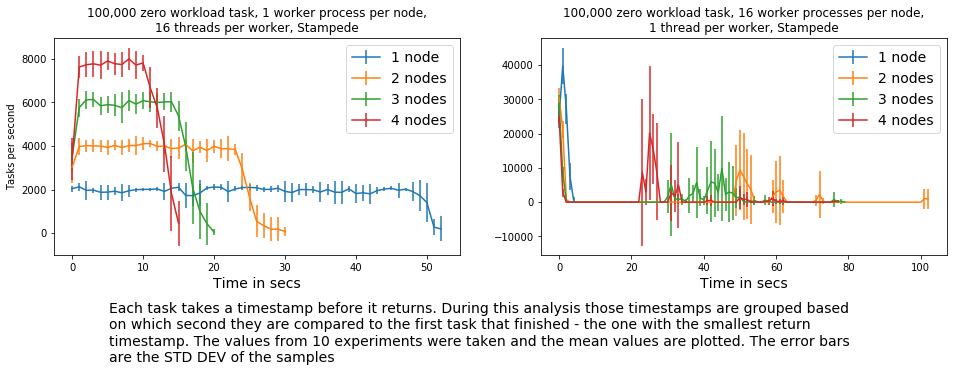

In [8]:
txt = '''
      Each task takes a timestamp before it returns. During this analysis those timestamps are grouped based
      on which second they are compared to the first task that finished - the one with the smallest return
      timestamp. The values from 10 experiments were taken and the mean values are plotted. The error bars
      are the STD DEV of the samples
      '''
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
axes[0].errorbar(range(0,distDelay_16_16t_hist.shape[1]),distDelay_16_16t_hist.mean(0),yerr=distDelay_16_16t_hist.std(0),label='1 node')
axes[0].errorbar(range(0,distDelay_32_16t_hist.shape[1]),distDelay_32_16t_hist.mean(0),yerr=distDelay_32_16t_hist.std(0),label='2 nodes')
axes[0].errorbar(range(0,distDelay_48_16t_hist.shape[1]),distDelay_48_16t_hist.mean(0),yerr=distDelay_48_16t_hist.std(0),label='3 nodes')
axes[0].errorbar(range(0,distDelay_64_16t_hist.shape[1]),distDelay_64_16t_hist.mean(0),yerr=distDelay_64_16t_hist.std(0),label='4 nodes')
axes[0].legend(fontsize='14')
axes[0].set_ylabel('Tasks per second')
axes[0].set_title('100,000 zero workload task, 1 worker process per node,\n16 threads per worker, Stampede')
axes[0].set_xlabel('Time in secs',fontsize='14')

axes[1].errorbar(range(0,distDelay_16_1t_hist.shape[1]),distDelay_16_1t_hist.mean(0),yerr=distDelay_16_1t_hist.std(0),label='1 node')
axes[1].errorbar(range(0,distDelay_32_1t_hist.shape[1]),distDelay_32_1t_hist.mean(0),yerr=distDelay_32_1t_hist.std(0),label='2 nodes')
axes[1].errorbar(range(0,distDelay_48_1t_hist.shape[1]),distDelay_48_1t_hist.mean(0),yerr=distDelay_48_1t_hist.std(0),label='3 nodes')
axes[1].errorbar(range(0,distDelay_64_1t_hist.shape[1]),distDelay_64_1t_hist.mean(0),yerr=distDelay_64_1t_hist.std(0),label='4 nodes')
axes[1].legend(fontsize='14')
axes[1].set_title('100,000 zero workload task, 16 worker processes per node,\n1 thread per worker, Stampede')
axes[1].set_xlabel('Time in secs',fontsize='14')
fig.text(0.15,-0.3,txt,fontsize=14)
#plt.savefig('daskThroughputvsNodes16proc.pdf',dpi=800,bbox_inches='tight')
#plt.savefig('daskThroughputvsNodes16proc.png',dpi=800,bbox_inches='tight')

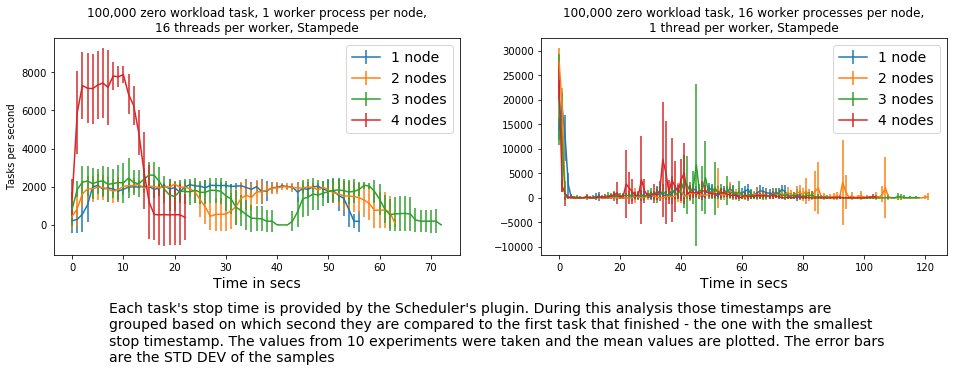

In [9]:
txt = '''
      Each task's stop time is provided by the Scheduler's plugin. During this analysis those timestamps are 
      grouped based on which second they are compared to the first task that finished - the one with the smallest 
      stop timestamp. The values from 10 experiments were taken and the mean values are plotted. The error bars 
      are the STD DEV of the samples
      '''
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
axes[0].errorbar(range(0,distDelay1_16_hist.shape[1]),distDelay1_16_hist.mean(0),yerr=distDelay1_16_hist.std(0),label='1 node')
axes[0].errorbar(range(0,distDelay1_32_hist.shape[1]),distDelay1_32_hist.mean(0),yerr=distDelay1_32_hist.std(0),label='2 nodes')
axes[0].errorbar(range(0,distDelay1_48_hist.shape[1]),distDelay1_48_hist.mean(0),yerr=distDelay1_48_hist.std(0),label='3 nodes')
axes[0].errorbar(range(0,distDelay1_64_hist.shape[1]),distDelay1_64_hist.mean(0),yerr=distDelay1_64_hist.std(0),label='4 nodes')
axes[0].legend(fontsize='14')
axes[0].set_ylabel('Tasks per second')
axes[0].set_title('100,000 zero workload task, 1 worker process per node,\n16 threads per worker, Stampede')
axes[0].set_xlabel('Time in secs',fontsize='14')
axes[0].set_xlabel('Time in secs',fontsize='14')

axes[1].errorbar(range(0,distDelay_16_hist.shape[1]),distDelay_16_hist.mean(0),yerr=distDelay_16_hist.std(0),label='1 node')
axes[1].errorbar(range(0,distDelay_32_hist.shape[1]),distDelay_32_hist.mean(0),yerr=distDelay_32_hist.std(0),label='2 nodes')
axes[1].errorbar(range(0,distDelay_48_hist.shape[1]),distDelay_48_hist.mean(0),yerr=distDelay_48_hist.std(0),label='3 nodes')
axes[1].errorbar(range(0,distDelay_64_hist.shape[1]),distDelay_64_hist.mean(0),yerr=distDelay_64_hist.std(0),label='4 nodes')
axes[1].legend(fontsize='14')
axes[1].set_title('100,000 zero workload task, 16 worker processes per node,\n1 thread per worker, Stampede')
axes[1].set_xlabel('Time in secs',fontsize='14')
fig.text(0.15,-0.3,txt,fontsize=14)
axes[1].set_xlabel('Time in secs',fontsize='14')